In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt

In this problem statement we r only going to solve Electric_Production.csv

In [3]:
train=pd.read_csv("Electric_Production.csv")

In [4]:
train.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
DATE          397 non-null object
IPG2211A2N    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


we r gonna solve time series problem

step1:we clearly see dtype of column DATE is object,we have to convert it into DATETIME

step2:we have to remove the index,and made DATE as index

In [6]:
train["DATE"]=pd.to_datetime(train["DATE"],infer_datetime_format=True)

In [7]:
train=train.set_index(['DATE'])

In [8]:
train.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# Lets visulize our data(before that we should understand following terms)

# Trend

1-The increasing or decreasing value in the series

2-we can take example of facebook

3-Number of facebook users is increasing with time,so its a trend

4-Number of people who uses Yahoo as their search engine are deacreasing,its also a trend but a decreasing trend

5-Mathematical Curve-it can be linear or damped or exponential

# Seasonality

2-Lets understand by taking an example of icecream

3-We all eats ice-cream mostly in summers

4-Therefore the sales of icecreams is increases mostly in summers and then drop down in winter(that what we called seasonality)

5-Mathematics curve-its mostly of a sin curve or a distorted sin curve

# Trend with seasonality


1-we can take example of ice cream sales

2-World population is increasing every year(so its  trend)

3-In summers ice creams sells more than winter(its a seasonality)

4-so we can say that as time increasing ice cream sales also increasing because buyers are increasing and in summers it increases more due to seasonality effect

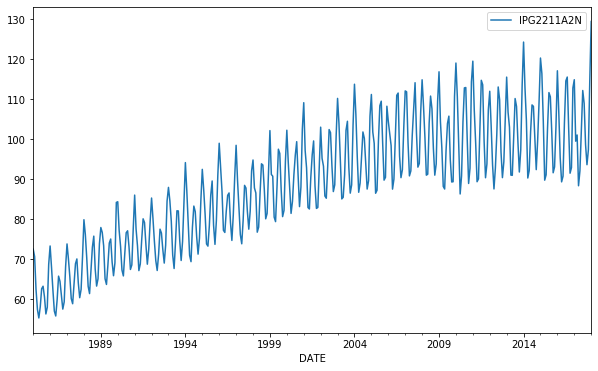

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6
train.plot()

We clearly see that their is an increasing trend and seasonality

Now we will decompose the above visulization into trend and seasonality for more clear visulization

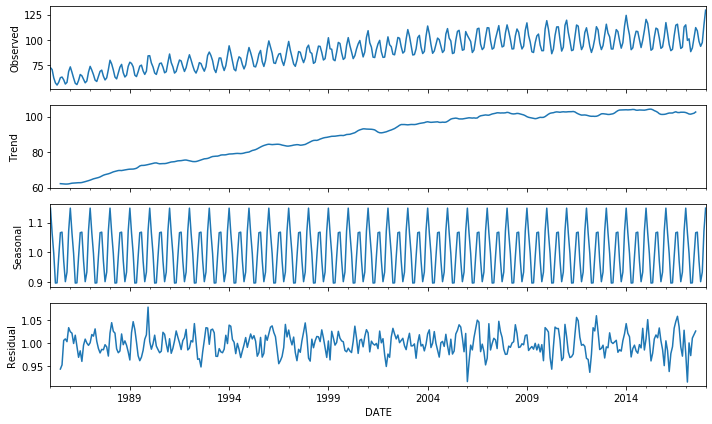

In [10]:

from statsmodels.tsa.seasonal import seasonal_decompose
res= seasonal_decompose(train, model='multiplicative')
res.plot()
plt.show()

Residual means Noise

We clearly see their is a increasing trend

Lets see the first 60 value of our data to understand seasonality more visually

In [11]:
train["IPG2211A2N"].iloc[:60]

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
1985-06-01    58.0904
1985-07-01    62.6202
1985-08-01    63.2485
1985-09-01    60.5846
1985-10-01    56.3154
1985-11-01    58.0005
1985-12-01    68.7145
1986-01-01    73.3057
1986-02-01    67.9869
1986-03-01    62.2221
1986-04-01    57.0329
1986-05-01    55.8137
1986-06-01    59.9005
1986-07-01    65.7655
1986-08-01    64.4816
1986-09-01    61.0005
1986-10-01    57.5322
1986-11-01    59.3417
1986-12-01    68.1354
1987-01-01    73.8152
1987-02-01    70.0620
1987-03-01    65.6100
1987-04-01    60.1586
1987-05-01    58.8734
1987-06-01    63.8918
1987-07-01    68.8694
1987-08-01    70.0669
1987-09-01    64.1151
1987-10-01    60.3789
1987-11-01    62.4643
1987-12-01    70.5777
1988-01-01    79.8703
1988-02-01    76.1622
1988-03-01    70.2928
1988-04-01    63.2384
1988-05-01    61.4065
1988-06-01    67.1097
1988-07-01    72.9816
1988-08-01    75.7655
1988-09-01    67.5152
1988-

U can  also see that after every year at January the electric production increases

so we can say that its a yearly seasonality

# STEP3-REMOVE TREND TO MADE DATA STATIONARY

# STATIONARITY

1-Data didnt have any trend and seasonality

2-In practical sense electric production is not increasing with time it is constant its does not have any seasonality effect

3-Why requires?Just like data needs to be normalized,features needs to be scaled before sending to ML algorithms,similarly time series algorithms wants data to be stationary

4-Mathematically-Means should be constant,standard deviation should be constant,auto-correlation should be same

5-we r going to check it using adfuller test(p-value will be used as a distinguisher (if p-value>0.05=Non-Stationary,if p-value<0.05=Stationary)

Lets do adfuller on our dataset

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
def stest(x):
    result = adfuller(x)
    print(result[1])

In [14]:
stest(train.iloc[:,0].values)

0.1862146911658708


0.18621>0.05 data is non stationary

Lets make it stationary

we will use differencing method for removing trend and seasonality

For eg.:
if our data is like:[1,2,3,4,5,6,7,8,9]

If we subtract each two adjacent digit then our data will be:[2-1,4-3,5-4,6-5,7-6,8-7,9-8]:[1,1,1,1,1,1,1,1...]

Point to remember:Removing trend didnot mean that we should make the value constant for whole interval,it only means that the MEAN should be same for sub-interval in a interval

In [15]:
len(train)


397

In [16]:
a=[]
a.append(train["IPG2211A2N"].iloc[0])
for i in range(396):
     z=train["IPG2211A2N"].iloc[i+1]-train["IPG2211A2N"].iloc[i]
     a.append(z)

In [17]:
a[:5]

[72.5052, -1.833200000000005, -8.221799999999995, -4.9788, -2.1563000000000017]

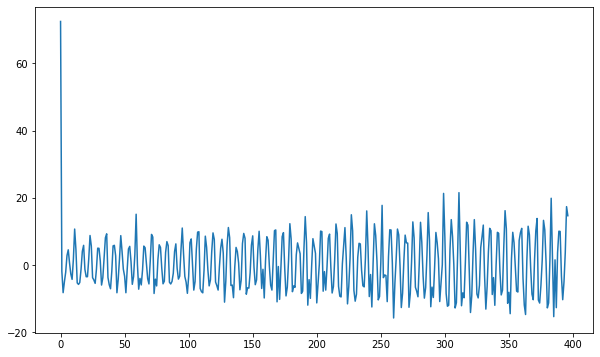

In [18]:
plt.plot(a)

Now lets go for adfuller test

In [19]:
stest(a)

3.1454921878386305e-09


0.0003875068

clearly 0.05>0.0003875068

Our Data is Stationary

In [20]:
t=train["IPG2211A2N"].to_dict()
x={}
l=0
for i,j in t.items():
       x.update({i:a[l]})
       l=l+1
   

In [21]:
xe=pd.Series(x)

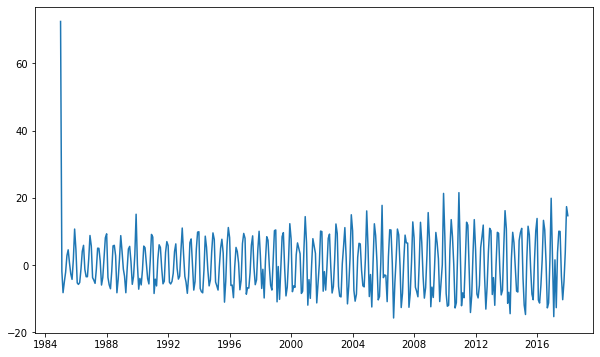

In [22]:
plt.plot(xe)

# ARIMA

ARIMA-{AutoRegression}{Integrated}{Moving Average}

Auto Regression=It simply means values at present time is dependent on which-which previous time instant

m(t)=Am(t-1)+Bm(t-3)+Cm(t-4)+....

In above eg. m(t) is present time and it clearly depends on lag of 1,lag of 3,lag of 4 time instant

PACF=Partial auto correlation value is used to calculate AR value(when line is above blue region we will count those value and total will be our AR value for our ARIMA model)

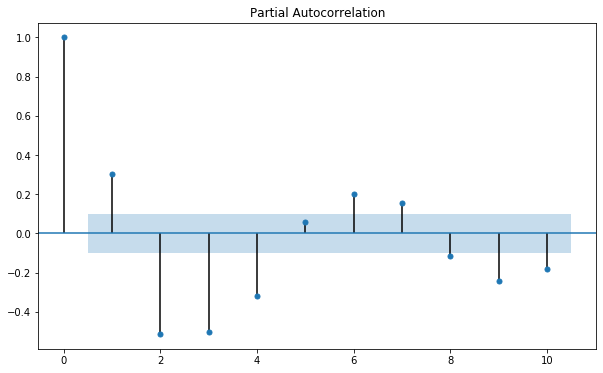

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot=plot_pacf(xe,lags=10)

> AR=3(most significant values)

Moving Average=It is calculated using Autocorrelation (when the line goes above blue region we will count them all the total will be our MA)

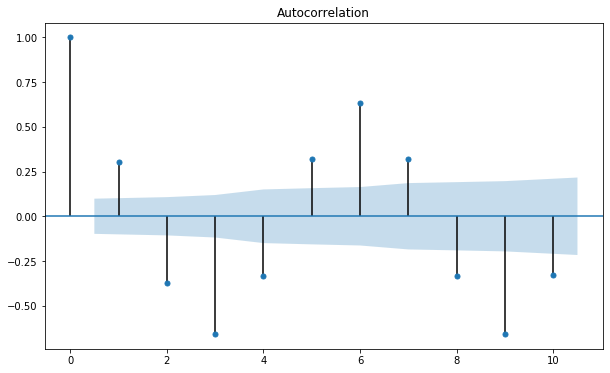

In [24]:
acf_plot=plot_acf(xe,lags=10)

we are counting most significant line MA=3)

Train/Test Split

In [25]:
len(xe)

397

In [26]:
xtrain=xe[0:330]
xtest=xe[330:397]

In [27]:
len(xtrain)

330

In [28]:
xtrain.head()

1985-01-01    72.5052
1985-02-01    -1.8332
1985-03-01    -8.2218
1985-04-01    -4.9788
1985-05-01    -2.1563
dtype: float64

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
xee=ARIMA(xtrain,order=(3,0,3))

E:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [31]:
ttt=xee.fit()

E:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [32]:
ttt.aic

2026.9505868270646

In [33]:
tt=ttt.forecast(steps=67)[0]

In [34]:
tt[:10]

array([  8.91488416,  -3.92562535, -12.11348228,  -8.11814129,
         4.05546975,  12.21680495,   8.19319204,  -3.98616681,
       -12.12499429,  -8.07315725])

In [35]:
xtest.values[:10]

array([ 11.8957,  -3.1756, -13.117 ,  -6.3626,   3.9612,  10.9305,
        10.2288,  -8.767 ,  -3.7392, -11.9856])

In [36]:
xtest.size

67

Lets compare our forecasted value but before that we have to convert those forecast value to their original format(to remove trend we have subtracted one value from other now we have to reverse that process to get original value back)

In [37]:
xtest[0]

11.895700000000005

In [38]:
qqq=[]
a=0
for i in range(330):
    a=a+xtrain[i]
    qqq.append(a)

In [39]:
train["IPG2211A2N"].iloc[335]

105.2722

In [40]:
qqq[329]

101.14

Great qqq[329]=101.14 we will use this value to find our forecast value and xtest value

In [41]:
def pv(web):
        qqq=[]
        a=101.4
        for i in range(67):
            a=a+web[i]
            qqq.append(a)
        return qqq

In [42]:

qqqt=pv(xtest)

In [43]:
qqqt[:10]

[113.29570000000001,
 110.12010000000001,
 97.0031,
 90.6405,
 94.60170000000001,
 105.5322,
 115.76100000000001,
 106.994,
 103.2548,
 91.26920000000001]

In [44]:
qqqf=pv(tt)

In [45]:
qqqf[:5]

[110.31488415619728,
 106.38925880792641,
 94.27577652875479,
 86.15763524358597,
 90.2131049926869]

qqqt is our test data and qqqf is our forecast data now we are going to check accuracy using root mean squared error

In [46]:
from sklearn.metrics import mean_squared_error 
import numpy as np

In [47]:
error=mean_squared_error(qqqt,qqqf)

In [48]:
error

29.121986427949984

In [49]:
np.sqrt(error)

5.396479076949153

Great our model is performing good with just a 5% error